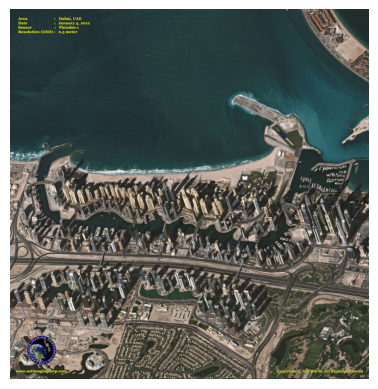

Image Shape/*/: (787, 763, 3)
*-*- (256, 256, 3)
1/1 [==============================] - 0s 298ms/step
--*-*--


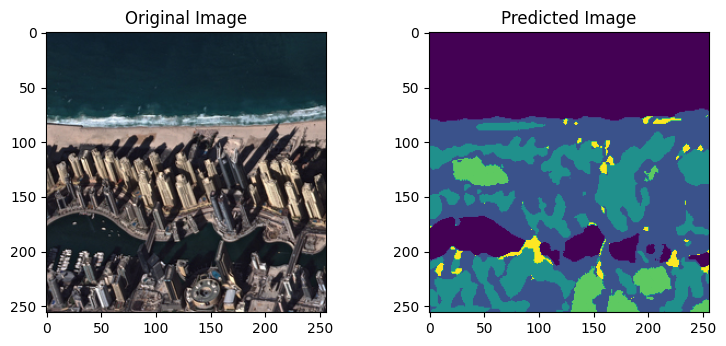

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
#from tensorflow import keras

# !pip install -U -q segmentation-models
# !pip install -q tensorflow==2.2.1
# !pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
##########

from PIL import Image
image_path = '01d.jpg'

# Open and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

import pickle

# Load the object from the pickle file
with open('total_loss.pkl', 'rb') as file:
    total_loss = pickle.load(file)

from tensorflow.keras.models import load_model

# Load the trained model
save_model = load_model('trained_model.h5',custom_objects={'dice_loss_plus_1focal_loss': total_loss,'jaccard_coef':jaccard_coef})

image_path = '01d.jpg'

img = Image.open(image_path)
img_array = np.array(img)
cropped_img_array = np.array(img)

# Display the shape of the array (height, width, channels for a color image)
print("Image Shape/*/:", cropped_img_array.shape)
crop_width = crop_height = 256

# Calculate the starting point for the crop
start_x = (img_array.shape[1] - crop_width) // 3
start_y = (img_array.shape[0] - crop_height) // 2

# Crop the image
cropped_img_array = img_array[start_y:start_y + crop_height, start_x:start_x + crop_width, :]
print('*-*-',cropped_img_array.shape)
# Open and display the image

# Assuming image01 is your image data with shape (height, width, channels)
# Reshape the image to (height * width, channels) for scaling
original_shape = cropped_img_array.shape
image01_reshaped = cropped_img_array.reshape(-1, original_shape[-1])

# Initialize the MinMaxScaler
minmaxscaler = MinMaxScaler()

# Fit and transform the reshaped image data
m1 = minmaxscaler.fit_transform(image01_reshaped)

s1 = m1.reshape(original_shape)

test_image_input = np.expand_dims(s1, 0)

prediction = save_model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(s1)
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)
print('--*-*--')



Image Shape: (846, 1099, 3)
1/1 [==============================] - 0s 51ms/step


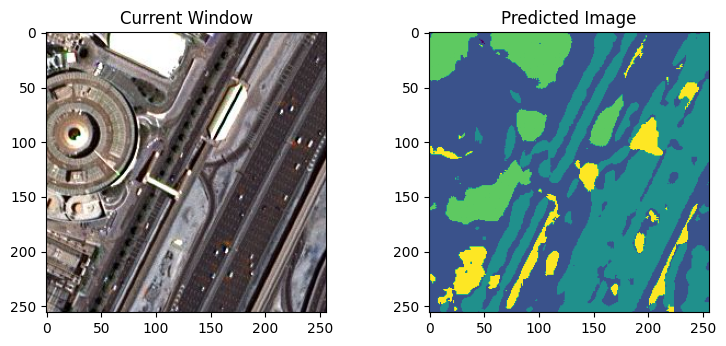

1/1 [==============================] - 0s 41ms/step


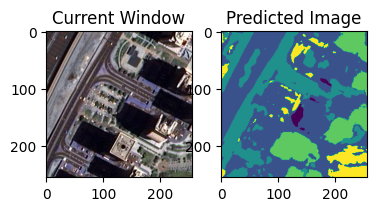

1/1 [==============================] - 0s 50ms/step


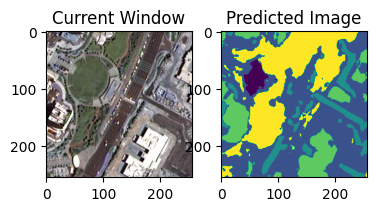

1/1 [==============================] - 0s 57ms/step


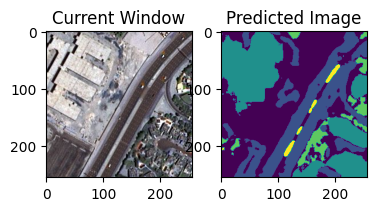

1/1 [==============================] - 0s 50ms/step


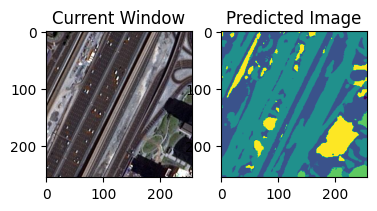

1/1 [==============================] - 0s 41ms/step


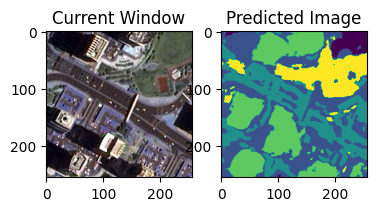

1/1 [==============================] - 0s 44ms/step


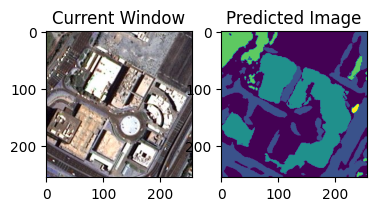

1/1 [==============================] - 0s 49ms/step


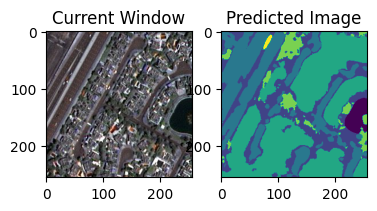

1/1 [==============================] - 0s 49ms/step


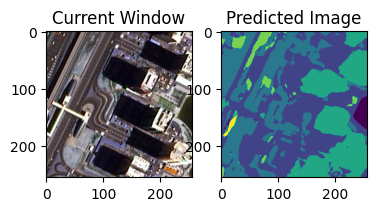

1/1 [==============================] - 0s 43ms/step


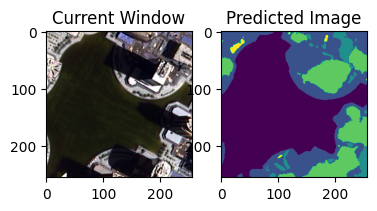

1/1 [==============================] - 0s 51ms/step


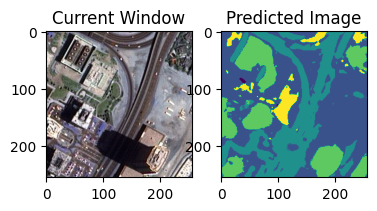

1/1 [==============================] - 0s 42ms/step


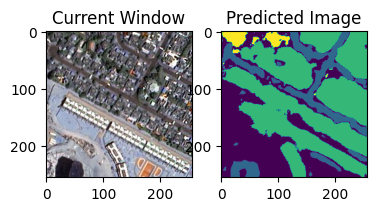

In [50]:
import cv2
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming img is your input image (JpegImageFile)
image_path = '04d.jpg'
img = Image.open(image_path)
cropped_img_array = np.array(img)

# Display the shape of the array (height, width, channels for a color image)
print("Image Shape:", cropped_img_array.shape)

window_size = (256, 256)
stride = 256  # You can adjust the stride based on your requirements

# Initialize the MinMaxScaler
minmaxscaler = MinMaxScaler()

# Fit and transform the reshaped image data (outside the loop)


plt.figure(figsize=(14, 8))

for y in range(0, cropped_img_array.shape[0] - window_size[0] + 1, stride):
    for x in range(0, cropped_img_array.shape[1] - window_size[1] + 1, stride):
        window = cropped_img_array[y:y+window_size[0], x:x+window_size[1]]

        original_shape = window.shape
        image01_reshaped = window.reshape(-1, original_shape[-1])
        m1 = minmaxscaler.fit_transform(image01_reshaped)
        s1 = m1.reshape(original_shape)
        test_image_input = np.expand_dims(s1, 0)

        
        prediction = save_model.predict(test_image_input)
        predicted_image = np.argmax(prediction, axis=3)
        predicted_image = predicted_image[0, :, :]

        # Plotting original image
        # plt.subplot(2, 3, 1)
        # plt.title("Original Image")
        # plt.imshow(s1)

        # Plotting the current window
        plt.subplot(2, 3, 2)
        plt.title("Current Window")
        plt.imshow(window)

        # Plotting predicted image
        plt.subplot(2, 3, 3)
        plt.title("Predicted Image")
        plt.imshow(predicted_image)

        plt.show()


Image Shape: (756, 1000, 3)
3
2
1/1 [==============================] - 0s 51ms/step


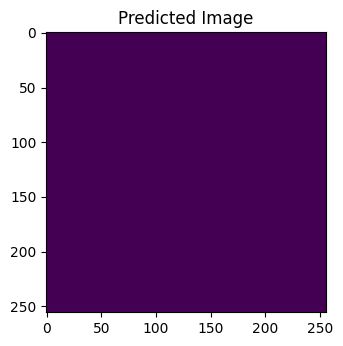

1/1 [==============================] - 0s 40ms/step


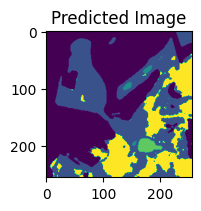

1/1 [==============================] - 0s 38ms/step


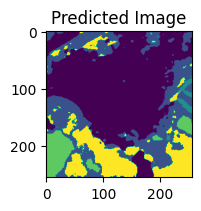

1/1 [==============================] - 0s 78ms/step


Text(0.5, 1.0, 'Image 1')

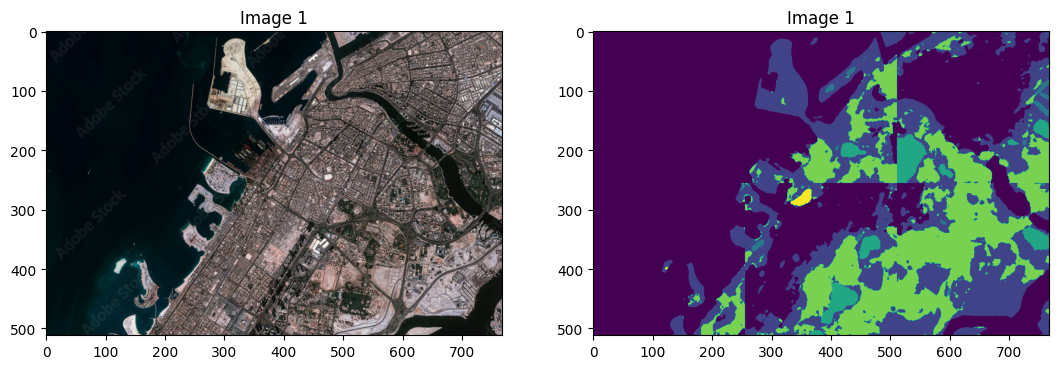

In [187]:
image_path = '03d.jpg'
img = Image.open(image_path)
cropped_img_array = np.array(img)

# Display the shape of the array (height, width, channels for a color image)
print("Image Shape:", cropped_img_array.shape)


window_size = (256, 256)
stride = 256  # You can adjust the stride based on your requirements

# Initialize the MinMaxScaler
minmaxscaler = MinMaxScaler()

# Fit and transform the reshaped image data (outside the loop)

plt.figure(figsize=(14, 8))

image = []
image1 = []
image2 = []

image0 = []
image01 = []
image02 = []


k = 0

for y in range(0, cropped_img_array.shape[0] - window_size[0] + 1, stride):
    # if k == 2:
    #     break
    
    for x in range(0, cropped_img_array.shape[1] - window_size[1] + 1, stride):
        k += 1
        if k < 4:
            window = cropped_img_array[y:y+window_size[0], x:x+window_size[1]]
            window = window[:, :window_size[1]]
            image.append(window)
            
            original_shape = window.shape
            image01_reshaped = window.reshape(-1, original_shape[-1])
            m1 = minmaxscaler.fit_transform(image01_reshaped)
            s1 = m1.reshape(original_shape)
            test_image_input = np.expand_dims(s1, 0)

            prediction = save_model.predict(test_image_input)
            predicted_image = np.argmax(prediction, axis=3)
            predicted_image = predicted_image[0, :, :]
            image0.append(predicted_image)

            plt.subplot(2, 3, 3)
            plt.title("Predicted Image")
            plt.imshow(predicted_image)

        plt.show()

        if k > 3 and k < 7:  
            window = cropped_img_array[y:y+window_size[0], x:x+window_size[1]]
            window = window[:, :window_size[1]]
            image1.append(window)
            
            original_shape = window.shape
            image01_reshaped = window.reshape(-1, original_shape[-1])
            m1 = minmaxscaler.fit_transform(image01_reshaped)
            s1 = m1.reshape(original_shape)
            test_image_input = np.expand_dims(s1, 0)

            prediction = save_model.predict(test_image_input)
            predicted_image = np.argmax(prediction, axis=3)
            predicted_image = predicted_image[0, :, :]
            image01.append(predicted_image)

        if k >  6:      
            window = cropped_img_array[y:y+window_size[0], x:x+window_size[1]]
            window = window[:, :window_size[1]]
            image2.append(window)
            
            original_shape = window.shape
            image01_reshaped = window.reshape(-1, original_shape[-1])
            m1 = minmaxscaler.fit_transform(image01_reshaped)
            s1 = m1.reshape(original_shape)
            test_image_input = np.expand_dims(s1, 0)

            prediction = save_model.predict(test_image_input)
            predicted_image = np.argmax(prediction, axis=3)
            predicted_image = predicted_image[0, :, :]
            image02.append(predicted_image)

# Horizontally concatenate the windows
concatenated_image = np.hstack(image)
concatenated_image1 = np.hstack(image1)
concatenated_image2 = np.hstack(image2)

concatenated = np.vstack((concatenated_image,concatenated_image1,concatenated_image2))

concatenated_image0 = np.hstack(image0)
concatenated_image01 = np.hstack(image01)
concatenated_image02 = np.hstack(image02)

concatenated0 = np.vstack((concatenated_image0,concatenated_image01,concatenated_image02))

plt.figure(figsize=(20,15))
plt.subplot(1, 3, 1)
plt.imshow(concatenated)
plt.title("Image 1")

plt.subplot(1, 3, 2)
plt.imshow(concatenated0)
plt.title("Image 1")
# plt.subplot(1, 3, 1)
# plt.imshow(concatenated_image)
# plt.title("Image 1")

# plt.subplot(1, 3, 2)
# plt.imshow(concatenated_image1)
# plt.title("Image 1")

# plt.subplot(1, 3, 3)
# plt.imshow(concatenated_image2)
# plt.title("Image 1")


Image Shape: (846, 1099, 3)
4
3
1/1 [==============================] - 0s 62ms/step


Text(0.5, 1.0, 'Image 1')

<Figure size 1400x800 with 0 Axes>

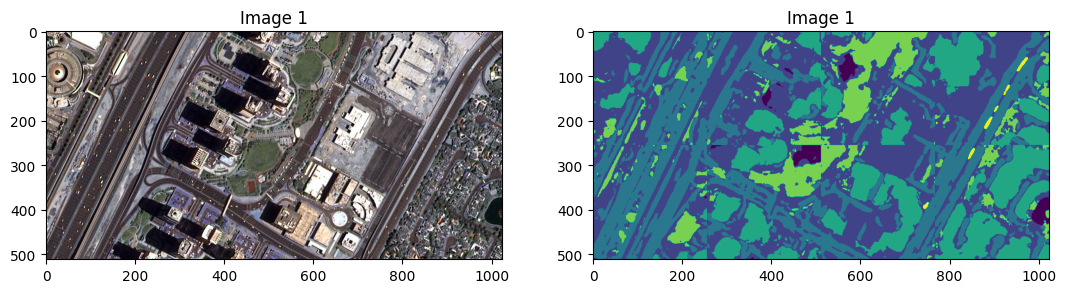

In [11]:
image_path = '04d.jpg'
img = Image.open(image_path)
cropped_img_array = np.array(img)

# Display the shape of the array (height, width, channels for a color image)
print("Image Shape:", cropped_img_array.shape)
kval = cropped_img_array.shape[1]//256
print(kval)

hval = cropped_img_array.shape[0]//256
print(hval)

if kval == 2:
    val = 3
    val2 = val + 2
elif kval == 3:
    val = 4
    val2 = val + 3
else:
    val = 5
    val2 = val + 4

window_size = (256, 256)
stride = 256  # You can adjust the stride based on your requirements

# Initialize the MinMaxScaler
minmaxscaler = MinMaxScaler()

# Fit and transform the reshaped image data (outside the loop)

plt.figure(figsize=(14, 8))

image = []
image1 = []
image2 = []

image0 = []
image01 = []
image02 = []

k = 0

for y in range(0, cropped_img_array.shape[0] - window_size[0] + 1, stride):
    
    for x in range(0, cropped_img_array.shape[1] - window_size[1] + 1, stride):
        k += 1
        if k <  val:
            window = cropped_img_array[y:y+window_size[0], x:x+window_size[1]]
            window = window[:, :window_size[1]]
            image.append(window)
            
            original_shape = window.shape
            image01_reshaped = window.reshape(-1, original_shape[-1])
            m1 = minmaxscaler.fit_transform(image01_reshaped)
            s1 = m1.reshape(original_shape)
            test_image_input = np.expand_dims(s1, 0)

            prediction = save_model.predict(test_image_input)
            predicted_image = np.argmax(prediction, axis=3)
            predicted_image = predicted_image[0, :, :]
            image0.append(predicted_image)

        if k > (val-1) and k < val2:  
            window = cropped_img_array[y:y+window_size[0], x:x+window_size[1]]
            window = window[:, :window_size[1]]
            image1.append(window)
            
            original_shape = window.shape
            image01_reshaped = window.reshape(-1, original_shape[-1])
            m1 = minmaxscaler.fit_transform(image01_reshaped)
            s1 = m1.reshape(original_shape)
            test_image_input = np.expand_dims(s1, 0)

            prediction = save_model.predict(test_image_input)
            predicted_image = np.argmax(prediction, axis=3)
            predicted_image = predicted_image[0, :, :]
            image01.append(predicted_image)

        if k > (val2-1):  
            window = cropped_img_array[y:y+window_size[0], x:x+window_size[1]]
            window = window[:, :window_size[1]]
            image2.append(window)
            
            original_shape = window.shape
            image01_reshaped = window.reshape(-1, original_shape[-1])
            m1 = minmaxscaler.fit_transform(image01_reshaped)
            s1 = m1.reshape(original_shape)
            test_image_input = np.expand_dims(s1, 0)

            prediction = save_model.predict(test_image_input)
            predicted_image = np.argmax(prediction, axis=3)
            predicted_image = predicted_image[0, :, :]
            image02.append(predicted_image)
        

# Horizontally concatenate the windows
if hval > 3:
    concatenated_image = np.hstack(image)
    concatenated_image1 = np.hstack(image1)
    concatenated_image2 = np.hstack(image2)
    concatenated = np.vstack((concatenated_image,concatenated_image1,concatenated_image2))

    concatenated_image0 = np.hstack(image0)
    concatenated_image01 = np.hstack(image01)
    concatenated_image02 = np.hstack(image02)
    concatenated0 = np.vstack((concatenated_image0,concatenated_image01,concatenated_image02))
if hval < 4:
    concatenated_image = np.hstack(image)
    concatenated_image1 = np.hstack(image1)
    concatenated = np.vstack((concatenated_image,concatenated_image1))

    concatenated_image0 = np.hstack(image0)
    concatenated_image01 = np.hstack(image01)
    concatenated0 = np.vstack((concatenated_image0,concatenated_image01))

plt.figure(figsize=(20,15))
plt.subplot(1, 3, 1)
plt.imshow(concatenated)
plt.title("Image 1")

plt.subplot(1, 3, 2)
plt.imshow(concatenated0)
plt.title("Image 1")

